# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


##### 1. What does the data describe?

2001 SAT scores by state for Math and Verbal sections, along with the percentage of high school students who took the SAT.

##### 2. Does the data look complete? Are there any obvious issues with the observations?

All of the data looks complete. There's a row that averages out all of the scores for each state, which shouldn't be included in my analysis and will have to be removed.

##### 3. Create a data dictionary for the dataset.

In [16]:
## moved to after #6


## Step 2: Load the data.

##### 4. Load the data into a list of lists

In [1]:
import csv
f = open('../data/sat_scores.csv', 'rU')
reader = csv.reader(f)
data = [row for row in reader]
f.close()

##### 5. Print the data

In [2]:
print(data)

[['State', 'Rate', 'Verbal', 'Math'], ['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12

##### 6. Extract a list of the labels from the data, and remove them from the data.

In [3]:
## numbers are in the lists as strings
## convert to integers
header = data[0]
sat_scores = data[1:len(data)-1] ## don't inclue the 'All' line

In [4]:
## 3. Create a data dictionary for the dataset.
sat_scores_dict = {}

for i in header:
    x = header.index(i)  ## need index number to select the appropriate values in sat_scores
    temp_list = []       ## create empty list for all corresponding values to be appended to
    for row in sat_scores:
        temp_list.append( row[x] )  ## add the values
    sat_scores_dict[header[x]] = temp_list  ## add the key and value list to the dictionary

##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [5]:
## take all values assigned to the 'State' key in the dictionary
state_names = sat_scores_dict['State'] 

##### 8. Print the types of each column

In [6]:
## since there are 4 values per row in sat_scores, 
## loop through each one in just the first row
## and print the column type
num_cols = len(sat_scores[0])
for i in range(0,num_cols):
    print 'Column ' + str(i+1) + ': ' + str(type(sat_scores[0][i]))

Column 1: <type 'str'>
Column 2: <type 'str'>
Column 3: <type 'str'>
Column 4: <type 'str'>


##### 9. Do any types need to be reassigned? If so, go ahead and do it.

In [7]:
## create a new list of lists, keeping the state column as a str
## and converting the remaining number columns to int
sat_scores = [ [row[0], int(row[1]), int(row[2]), int(row[3])] 
            for row in sat_scores]

for i in range(0,num_cols):
    print 'Column ' + str(i+1) + ': ' + str(type(sat_scores[0][i]))    

Column 1: <type 'str'>
Column 2: <type 'int'>
Column 3: <type 'int'>
Column 4: <type 'int'>


##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [11]:
rate = {}
math = {}
verbal = {}

## loop through each row of sat_ints 
## and assign the state key to the appropriate value
for row in sat_scores:
    rate[row[0]] = row[1]
    verbal[row[0]] = row[2]
    math[row[0]] = row[3]

##### 11. Create a dictionary with the values for each of the numeric columns

In [13]:
## loop through sat_scores and append 
## the appropriate values to each list
rate_list = []
verbal_list = []
math_list = []

for row in sat_scores:
    rate_list.append(row[1])
    verbal_list.append(row[2])
    math_list.append(row[3])

## assign those lists to their respective keys    
sat_numeric = {'rate': rate_list, 
               'verbal' : verbal_list, 
               'math' : math_list}

## Step 3: Describe the data

##### 12. Print the min and max of each column

In [14]:
print('RATE (min,max) = ' + str((min(rate_list),max(rate_list))))
print('VERBAL (min,max) = ' + str((min(verbal_list),max(verbal_list))))
print('MATH (min,max) = ' + str((min(math_list),max(math_list))))

RATE (min,max) = (4, 82)
VERBAL (min,max) = (482, 593)
MATH (min,max) = (439, 603)


##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [16]:
import numpy as np

def standard_deviation(column):
    sample_mean = np.mean(column) ## get the average for the column
    squared_distance = [(i-sample_mean)**2 for i in column] ## for each value in the column, square the difference from the mean
    sum_sq_diff = sum(squared_distance) ## take the sum of all squared distinces from the mean
    variance = sum_sq_diff / (len(column) -1 ) ## compute the variance by dividing the sum by n - 1
    std_dev = variance ** (0.5) ## take the square root of the variance to get standard deviation
    return round(std_dev,5)
      
print(standard_deviation(rate_list))
print(standard_deviation(verbal_list))
print(standard_deviation(math_list))

27.55068
33.36067
36.28739


## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

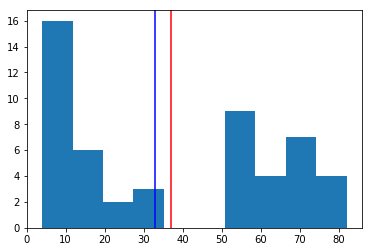

In [17]:
import matplotlib.pyplot as plt
import matplotlib.figure as fig

plt.hist(rate_list) ## plot a histogram for the rate values
plt.axvline(np.median(rate_list), color="b") ## blue line represents the median value
plt.axvline(np.mean(rate_list), color="r")   ## red line represents the mean value
plt.show()





##### 15. Plot the Math(s) distribution

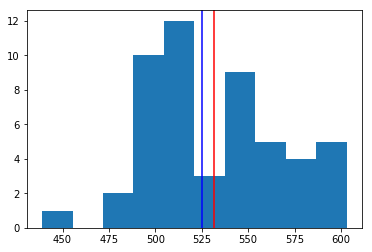

In [18]:

plt.hist(math_list) ## plot a histogram for the rate values
plt.axvline(np.median(math_list), color="b") ## blue line represents the median value
plt.axvline(np.mean(math_list), color="r")   ## red line represents the mean value
plt.show()


##### 16. Plot the Verbal distribution

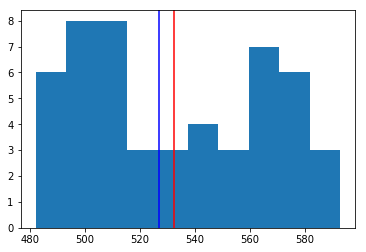

In [19]:

plt.hist(verbal_list) ## plot a histogram for the rate values
plt.axvline(np.median(verbal_list), color="b") ## blue line represents the median value
plt.axvline(np.mean(verbal_list), color="r")   ## red line represents the mean value
plt.show()


##### 17. What is the typical assumption for data distribution?

Normality, or relative normality as in the mean and median values are close

##### 18. Does that distribution hold true for our data?

No, it does not. Each variable is far from normal.

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

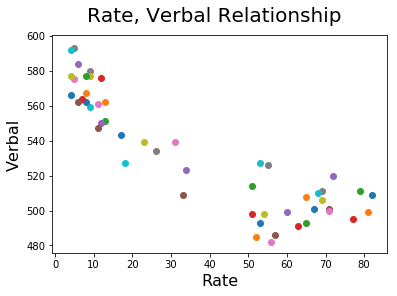

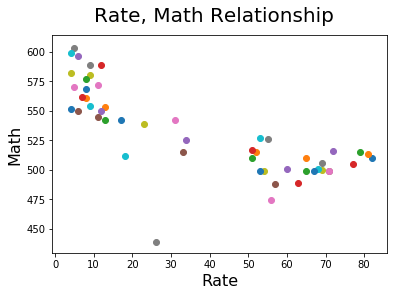

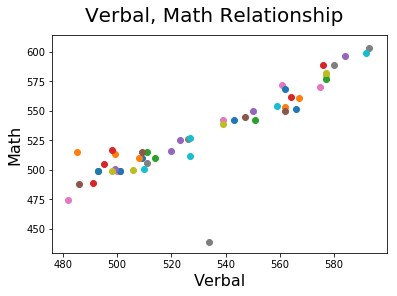

In [21]:
plt.figure(1) ## indicates the first figure to display

## rate vs verbal
scatter_1 = [plt.scatter(row[1],row[2]) for row in sat_scores]
plt.suptitle('Rate, Verbal Relationship', fontsize=20)
plt.xlabel('Rate', fontsize=16)
plt.ylabel('Verbal', fontsize=16)

plt.figure(211) ## indicates that we want to display a second figure below

## rate vs math

[plt.scatter(row[1],row[3]) for row in sat_scores]
plt.suptitle('Rate, Math Relationship', fontsize=20)
plt.xlabel('Rate', fontsize=16)
plt.ylabel('Math', fontsize=16)

plt.figure(212) ## indicates that we want to display a third figure below

## math vs verbal
[plt.scatter(row[2],row[3]) for row in sat_scores]
plt.suptitle('Verbal, Math Relationship', fontsize=20)
plt.xlabel('Verbal', fontsize=16)
plt.ylabel('Math', fontsize=16)

plt.show()

##### 20. Are there any interesting relationships to note?

There's negative correlation for both rate, verbal and for rate, math. This means that smaller participation rates are associated with higher scores in both cases, and that higher participation rates are asssociated with lower scores. This greatly affects how we are able to look at the data. I broke down scores by US region (below heat maps) and found that the Midwest scores were higher than the Northeast--which was the opposite of my biased assumption. If you look closer, however, the Midwest has a much lower participation rate, which makes it seem like not enough of a diverse population of students take the exam. This is a very biased sample. Now that I see the great difference in participation rates, my focus is no longer on the scores, but why the rates are down outside of the East Coast.

##### 21. Create box plots for each variable. 

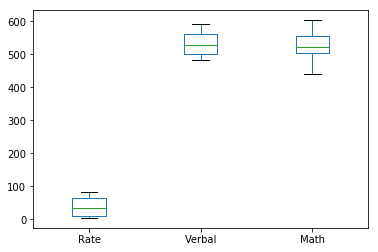

In [22]:
import pandas as pd
f = '../data/sat_scores.csv'
sat_pandas = pd.read_csv(f, header=0, na_filter=False)

%matplotlib inline
sat_pandas.plot(kind='box')

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

In [23]:
%%HTML
<div class='tableauPlaceholder' id='viz1489527750572' style='position: relative'><noscript><a href='#'><img alt='2001 Average Math SAT Scores by State ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Av&#47;AverageMathSATScoresbyState&#47;Sheet2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='path' value='views&#47;AverageMathSATScoresbyState&#47;Sheet2?:embed=y&amp;:display_count=y' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Av&#47;AverageMathSATScoresbyState&#47;Sheet2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1489527750572');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [24]:
%%HTML
<div class='tableauPlaceholder' id='viz1489528066797' style='position: relative'><noscript><a href='#'><img alt='2001 SAT Participation Rate by State ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;20&#47;2001SATParticipationRatebyState_0&#47;Sheet3&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='path' value='views&#47;2001SATParticipationRatebyState_0&#47;Sheet3?:embed=y&amp;:display_count=y' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;20&#47;2001SATParticipationRatebyState_0&#47;Sheet3&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1489528066797');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [25]:
%%HTML
<div class='tableauPlaceholder' id='viz1489528167633' style='position: relative'><noscript><a href='#'><img alt='2001 Average Verbal SAT Scores by State ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;20&#47;2001AverageVerbalSATScoresbyState&#47;Sheet4&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='2001AverageVerbalSATScoresbyState&#47;Sheet4' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;20&#47;2001AverageVerbalSATScoresbyState&#47;Sheet4&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1489528167633');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [26]:
## to confirm my suspicions about performance by region,
## I found and utilized a list of all states, their region, and subregion
## source: http://researchertools.blogspot.com/2012/09/excel-file-with-us-states-abbreviations.html

import csv
f = open('../data/US_STATES_REGIONS_SUBREGIONS.csv', 'rU')
reader = csv.reader(f)
states_data = [row for row in reader]
f.close()

In [28]:
states_data_header = states_data[0]
states_regions = states_data[1:]

regions = set([row[2] for row in states_regions])
subregions = set([row[3] for row in states_regions])
regions_dictionary = {'West' : [row[1] for row in states_regions if row[2]=='West'],
                      'Northeast' : [row[1] for row in states_regions if row[2]=='Northeast'],
                      'Midwest' : [row[1] for row in states_regions if row[2]=='Midwest'], 
                      'South' : [row[1] for row in states_regions if row[2]=='South']}

rate_by_region = []
for region in regions:
    region_rate = [row[1] for row in sat_scores if row[0] in regions_dictionary[region]]
    region_verbal = [row[2] for row in sat_scores if row[0] in regions_dictionary[region]]
    region_math = [row[3] for row in sat_scores if row[0] in regions_dictionary[region]]
    region_dict = {}
    region_dict['region']=region
    region_dict['region_mean_rate'] = round(np.mean(region_rate),2)
    region_dict['region_median_rate'] = round(np.median(region_rate),2)
    region_dict['region_mean_verbal'] = round(np.mean(region_verbal),2)
    region_dict['region_median_verbal'] = round(np.median(region_verbal),2)
    region_dict['region_mean_math'] = round(np.mean(region_math),2)
    region_dict['region_median_math'] = round(np.median(region_math),2)
    rate_by_region.append(region_dict)

In [29]:
## print the mean and median of each score type for each region
for region in rate_by_region:
    print region['region']
    print ('RATE: mean = ' + str(region['region_mean_rate']) + 
            '; median = ' + str(region['region_median_rate']) )
    print ('VERBAL: mean = ' + str(region['region_mean_verbal']) + 
            '; median = ' + str(region['region_median_verbal']) )
    print ('MATH: mean = ' + str(region['region_mean_math']) + 
            '; median = ' + str(region['region_median_math']) )
    print ""

West
RATE: mean = 33.0; median = 33.0
VERBAL: mean = 528.92; median = 527.0
MATH: mean = 531.92; median = 527.0

Northeast
RATE: mean = 74.56; median = 72.0
VERBAL: mean = 505.78; median = 506.0
MATH: mean = 507.0; median = 506.0

Midwest
RATE: mean = 13.5; median = 8.5
VERBAL: mean = 567.67; median = 577.0
MATH: mean = 566.25; median = 581.0

South
RATE: mean = 35.56; median = 35.5
VERBAL: mean = 527.31; median = 518.5
MATH: mean = 523.56; median = 511.0



In [44]:
## Now I'm curious to see how Midwest ACT participation rates stack up.
## As long as participation rates for the Midwest are significantly
## higher than their SAT participation rates, I think it's fair to say
## not that fewer Midwestern students are taking college entrance exams,
## but fewer are taking the SAT. Let's actually look at some ACT data.

# data source = https://forms.act.org/newsroom/data/2001/states.html
# * Totals for graduating seniors were obtained from Projections of High School Graduates by State and Race/Ethnicity 1996-2012, Copyright © by Western Interstate Commission for Higher Education, February, 1998.
# ** Core Course = at least four years of English and three years each of mathematics (algebra and above), social sciences, and natural sciences
# I'm going to multiply the percentage of graduates who also completed the Core Course requirement as a comparison to the SAT sample to get their percentage of the whole
# Important to note that the SAT data isn't just graduates ...

import csv
f = open('../data/act_scores.csv', 'rU')
reader = csv.reader(f)
act_data = [row for row in reader]
f.close()

act_scores = [[row[0],float(row[1]),float(row[2]),float(row[3])] for row in act_data[1:]]
header = act_scores[0]
act_scores = act_scores[1:]


In [58]:
%%HTML
<div class='tableauPlaceholder' id='viz1490006784570' style='position: relative'><noscript><a href='#'><img alt='2001 ACT Participation Rates for HS Graduates ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;20&#47;2001ACTPartipationRates&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='2001ACTPartipationRates&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;20&#47;2001ACTPartipationRates&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1490006784570');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>


In [57]:
%%HTML
<div class='tableauPlaceholder' id='viz1490006820143' style='position: relative'><noscript><a href='#'><img alt='2001 Average ACT Composite Scores for HS Graduates ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;20&#47;2001AverageACTCompositeScores&#47;Sheet2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='2001AverageACTCompositeScores&#47;Sheet2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;20&#47;2001AverageACTCompositeScores&#47;Sheet2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1490006820143');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [55]:
## similarly to the regions_dictionary for the SAT (using state abbreviations)
## use the full state name to classify by region and match to the ACT dataset
regions_dictionary_full = {'West' : [row[0] for row in states_regions if row[2]=='West'], 
                           'Northeast' : [row[0] for row in states_regions if row[2]=='Northeast'], 
                           'Midwest' : [row[0] for row in states_regions if row[2]=='Midwest'], 
                           'South' : [row[0] for row in states_regions if row[2]=='South']}
## region rate is where I multiply the % of the total that are core course
## in order to get the percentage of core course out of the whole

act_rate_by_region = []
for region in regions:
    region_rate = [row[1]*row[2]/100 for row in act_scores if row[0] in regions_dictionary_full[region]]
    region_composite = [row[3] for row in act_scores if row[0] in regions_dictionary_full[region]]
    region_dict = {}
    region_dict['region']=region
    region_dict['region_mean_rate'] = round(np.mean(region_rate),2)
    region_dict['region_median_rate'] = round(np.median(region_rate),2)
    region_dict['region_mean_composite'] = round(np.mean(region_composite),2)
    region_dict['region_median_composite'] = round(np.median(region_composite),2)
    act_rate_by_region.append(region_dict)

for region in act_rate_by_region:
    print region['region']
    print ('RATE: mean = ' + str(region['region_mean_rate']) + 
            '; median = ' + str(region['region_median_rate']) )
    print ('COMPOSITE: mean = ' + str(region['region_mean_composite']) + 
            '; median = ' + str(region['region_median_composite']) )
    print ""  


West
RATE: mean = 22.04; median = 23.79
COMPOSITE: mean = 22.59; median = 22.5

Northeast
RATE: mean = 3.64; median = 3.6
COMPOSITE: mean = 22.43; median = 22.2

Midwest
RATE: mean = 41.17; median = 42.78
COMPOSITE: mean = 22.64; median = 22.6

South
RATE: mean = 27.34; median = 24.75
COMPOSITE: mean = 20.85; median = 20.9



While it's hard to make any kind of conclusion given that the target samples of the SAT and ACT datasets are not identical, it is clear that states with low SAT participation rates have much higher ACT participation rates. The College Board needs to increase their presence in these high ACT participation states. I recommend that they collect more data on which schools these students are applying to with their ACT score and see if they can push the importance of SAT performance over ACT performance. Perhaps they could increase these schools' weight on SAT scores and therefore increase the need for students to take the SAT.